# Support Vector Machine (SVM)

## Import Libraries

In [85]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVC as svm

We create a set of artificial datas and add an outlier.

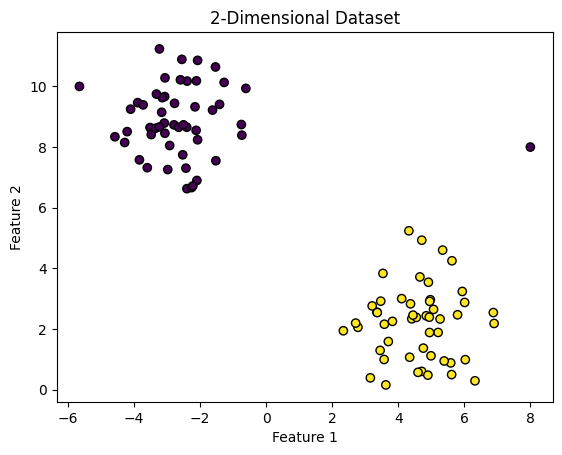

In [86]:
# Generació del dataset
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.2, random_state=42)

X = np.vstack([X, [8, 8]])
y = np.concatenate([y, [0]])

# Visualització del dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("2-Dimensional Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In today's session, we will introduce how to use hyperparameters and select their optimal values. A simple way to understand the hyperparameters of each model is to refer to the respective page in `scikit-learn`. You can find the hyperparameters of the SVM classifier at the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). 

The following function is to plot the decision boundary of the SVM.

In [87]:
def plot_svm_decision_boundary(model, X, y, titol=None):
    if titol is None:
        titol = "Decision Regions"

    # Crear un meshgrid
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibuixar l'hiperplà i els marges
    plt.contourf(xx, yy, Z > 0, alpha=0.6, cmap='coolwarm')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['blue', 'black', 'red'],
                linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
    plt.title(titol)
    plt.show()

An example:

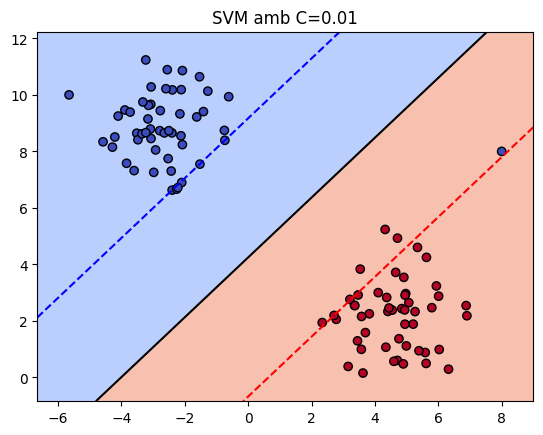

In [88]:
model = svm(kernel='linear', C=0.01)
model.fit(X, y)
plot_svm_decision_boundary(model, X, y, f"SVM amb C=0.01")


### EXERCISE 1: Study the effect of hyperparameter C. 

In [1]:
#TO DO

## GridSearchCV

In the training of machine learning models, a hyperparameter is any parameter that is not directly learned during the training process but must be defined before training begins. These parameters are configurations that influence the behavior of the model, as well as its ability to learn and generalize on new datasets.

Unlike parameters that are determined during the training of the model (such as weights in a neural network), hyperparameters must be set beforehand, typically based on the designer's experience, trial and error, or through search techniques.

`GridSearchCV` is a model optimization technique that finds the best combination of hyperparameters for a model by exhaustively testing various combinations defined in a search grid. This technique automates the process of searching for the optimal model configuration, thereby improving its performance. It employs cross-validation to determine the best model more accurately.

### EXERCISE 2: USE GRIDSEARCHCV

- Use GridSearchCV to obtain the best hyperparameters for the previous data.
- Print the best hyperparameters found and the accuracy of the best model. 
- With the best model, plot the decision boundary. 

`HINT`: [link](https://scikit-learn.org/0.18/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [2]:
# TO DO 

In [3]:
best_model = ...

In [ ]:
plot_svm_decision_boundary(best_model, X, y, f"SVM amb C={...}")

## SVM: NO LINEAL

Let's use the dataset from the last exercise, which is no linearly separable.

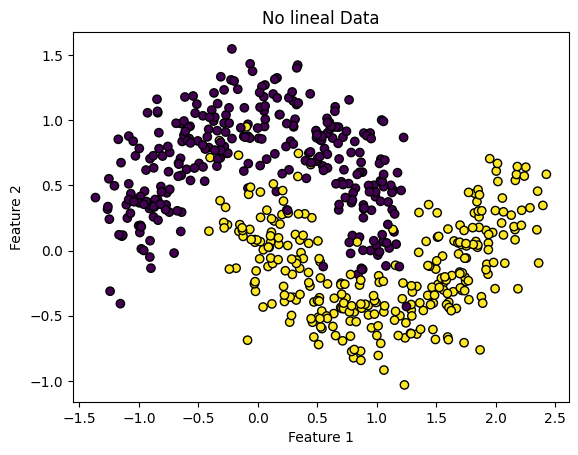

In [93]:
X, y = make_moons(n_samples=600, noise=0.20, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("No lineal Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Let's visualize the results obtained by a lineal SVM:

***Remember that in this exercise we split the data into two sets: train and test.***

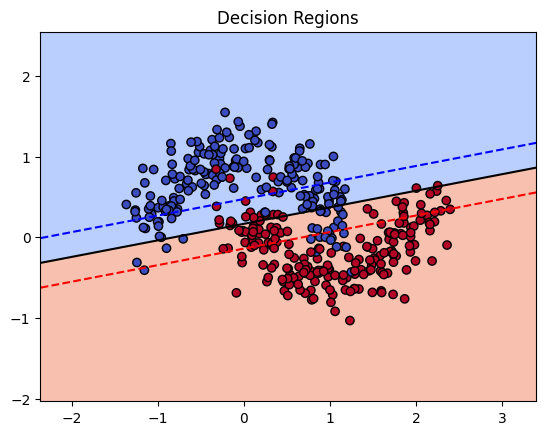

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(svm(kernel='linear'), param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
plot_svm_decision_boundary(grid_search, X_train, y_train)

In [95]:
print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       102
           1       0.90      0.82      0.86        96

    accuracy                           0.87       198
   macro avg       0.87      0.87      0.87       198
weighted avg       0.87      0.87      0.87       198



# Exercise 3: Study No lineal SVM 

- Use a RBF kernel and study the effect of gamma. 

In [ ]:
gamma = ...
for g in gamma:
# TO DO 

- Use gridSearch to find the best hyperparameters. 
- Print them and the best accuracy. 
- Using the best model compute evaluation metrics. 
- Plot the decision boundary of the best model 

In [ ]:
# TO DO 

In [ ]:
# TO DO 

In [4]:
# TO DO

In [ ]:
plot_svm_decision_boundary(...)

- Use a polynomial kernel
    -  Degree (degree): The degree of the polynomial function used as the kernel.
        - Determines the flexibility of the decision boundary. A higher degree allows the model to fit more complex patterns, but also increases the risk of overfitting.
    -  coef0: The constant term added to the polynomial kernel function. Hiher coef0: It weights more the terms with less degree, approximating the data to boundary more lineal. Low coef0: It weight more the terms with higher degree. 

- Use gridSearch to find the best hyperparameters. 
- Print them and the best accuracy. 
- Using the best model compute evaluation metrics. 
- Plot the decision boundary of the best model 